In [2]:
!pip install requests newspaper3k textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=d4f0e17f9e1b39893d0ee1f4d6018f4ff138449db9db9c4d0d02fe8f33e2a715
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=0d67f040e8f0437f44eaefca477a1472ac79e0244db59c247831f788b9c0fe08
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [3]:
pip install newsapi-python

In [4]:
from dateutil import parser
import regex as re
from textblob import TextBlob

from datetime import datetime
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

from wordcloud import WordCloud

import matplotlib.pyplot as plt

import pandas as pd
#from gensim.summarization import summarize # gensim must be 3.8

import requests


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
!pip install creds
!pip install gensim

In [6]:
!pip install newspaper3k textblob


In [215]:
import pandas as pd
from transformers import pipeline, BertTokenizer
import requests
from newspaper import Article
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize tokenizer from transformers
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Initialize lemmatizer and stop words set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    """Clean, tokenize, lemmatize text, remove stop words and short words, ensure it does not exceed 512 tokens."""
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Lemmatize, remove stop words and words shorter than four characters
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 3]
    # Convert tokens back to string
    cleaned_text = ' '.join(tokens)
    # Encode using BERT tokenizer
    encoded_tokens = tokenizer.encode(cleaned_text, add_special_tokens=True, max_length=512, truncation=True)
    return ' '.join(tokenizer.convert_ids_to_tokens(encoded_tokens))

# Define functions to fetch and process articles as before...

# Fetch articles
query = 'Trump'
api_key = 'e65c18fef2dc4c2fb52eef97a5691fc6'
api_url = 'https://newsapi.org/v2/everything'
articles_df = get_and_process_articles(query, api_key, api_url)

In [217]:


# necessary NLTK resources and BertTokenizer have already been initialized

def clean_and_tokenize(text):
    """Clean, tokenize, lemmatize text, remove stop words, punctuation, and short words, ensure it does not exceed 512 tokens."""
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())

    # Lemmatize, remove stop words, punctuation, and words shorter than four characters
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words and len(token) > 3]

    # Convert tokens back to string
    cleaned_text = ' '.join(tokens)

    # Encode using BERT tokenizer, handle subword prefix ##
    encoded_tokens = tokenizer.encode(cleaned_text, add_special_tokens=True, max_length=512, truncation=True)
    decoded_tokens = [token.replace("##", "") for token in tokenizer.convert_ids_to_tokens(encoded_tokens)]

    # Filter out any empty tokens or subword artifacts that might remain
    final_tokens = [token for token in decoded_tokens if token and token.isalpha()]

    return ' '.join(final_tokens)


# for index, row in articles_df.iterrows():
#     cleaned_text = clean_and_tokenize(row['Content'])
#     plot_word_frequency_with_title(cleaned_text, row['Title'], index + 1)


In [218]:
# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Apply sentiment analysis
articles_df['Sentiment'] = articles_df['Content'].apply(lambda x: sentiment_analyzer(x[:512])[0]['label'])
articles_df
# Print the DataFrame with sentiment analysis results
print(articles_df[['Title', 'Sentiment']])

                                               Title Sentiment
0  Net Neutrality Returns to a Very Different Int...  POSITIVE
1  Donald Trump Is 'Seriously Considering' Jake P...  NEGATIVE
2  Trumpist Loyalists Kill Vote on US Wiretap Pro...  NEGATIVE
3  RFK Jr.’s Very Online, Conspiracy-Filled Campaign  POSITIVE
4         Trump pushes legal challenges in two cases  NEGATIVE
5   Difficult search begins for impartial Trump jury  NEGATIVE
6  Trump Media Stock Plummets After Truth Social ...  NEGATIVE
7  Trump due back in court as hunt for jurors goe...  NEGATIVE
8  The Papers: 'Frantic diplomacy' over Iran and ...  NEGATIVE
9  Arizona indicts Trump allies over fake elector...  NEGATIVE


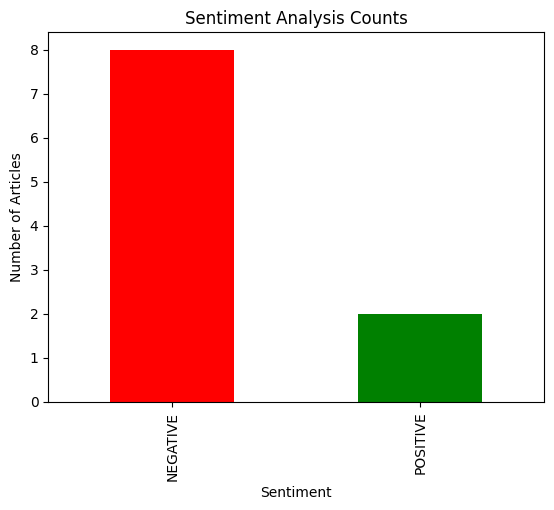

In [219]:
import matplotlib.pyplot as plt

# Assume articles_df['Sentiment'] can contain 'POSITIVE', 'NEGATIVE', and 'NEUTRAL'
sentiment_counts = articles_df['Sentiment'].value_counts()

# Ensure sentiment labels exactly match those returned by the model
colors = ['green' if sentiment == 'POSITIVE' else 'red' if sentiment == 'NEGATIVE' else 'blue' for sentiment in sentiment_counts.index]

# Plotting the bar chart with custom colors
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Analysis Counts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()


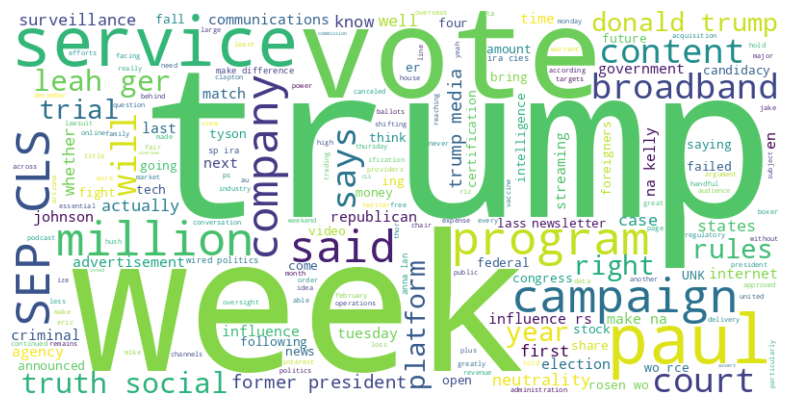

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(cleaned_texts):
    """ Generate and display a word cloud based on the text data provided.
        Filters out words shorter than 4 characters.
    """
    # Combine all text into one large string
    combined_text = " ".join(cleaned_texts)

    # Filter out words shorter than 4 characters
    filtered_text = ' '.join([word for word in combined_text.split() if len(word) > 3])

    # Generate the word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

    # Display the word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Assuming 'Content' column contains the pre-processed text
if 'Content' in articles_df.columns:
    cleaned_texts = articles_df['Content'].dropna().tolist()  # Make sure to drop any NaN values
    plot_wordcloud(cleaned_texts)
else:
    print("The 'Content' column is missing from the DataFrame.")


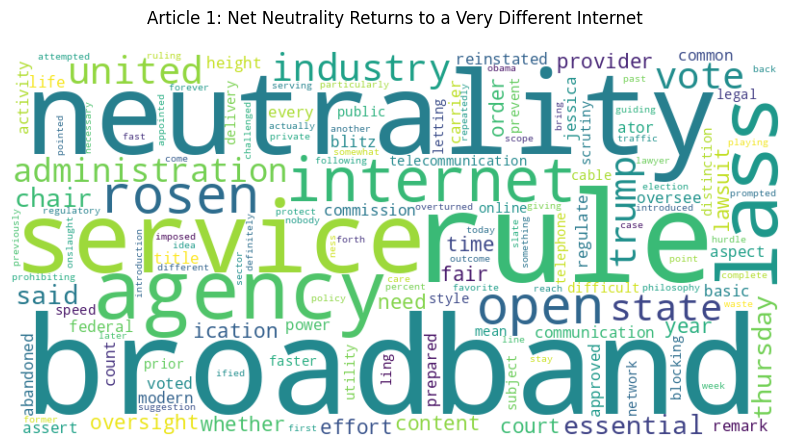

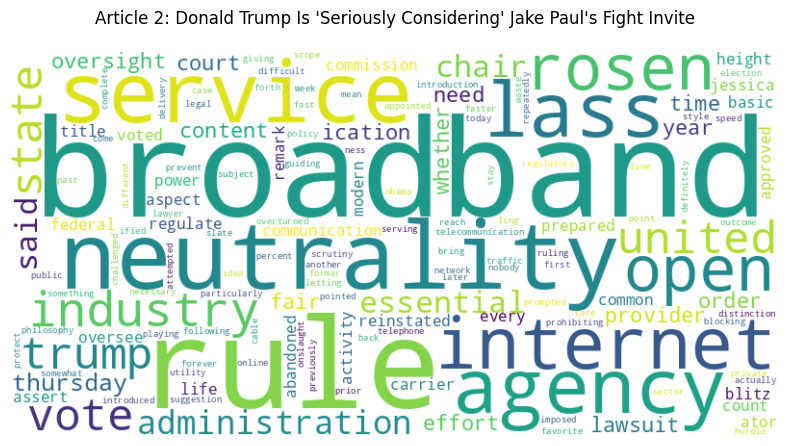

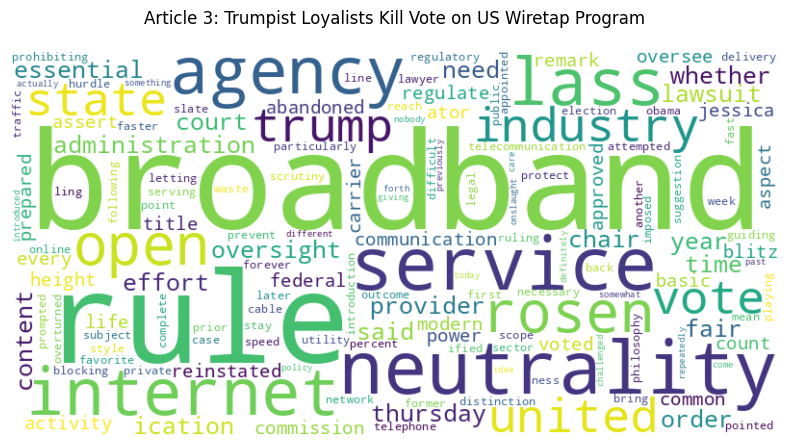

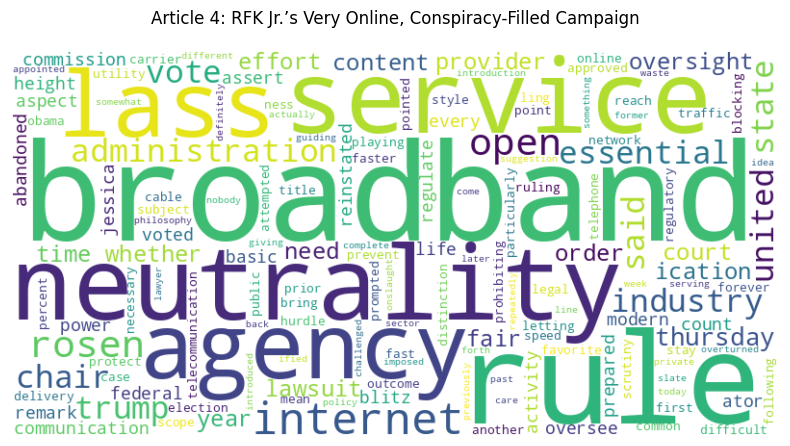

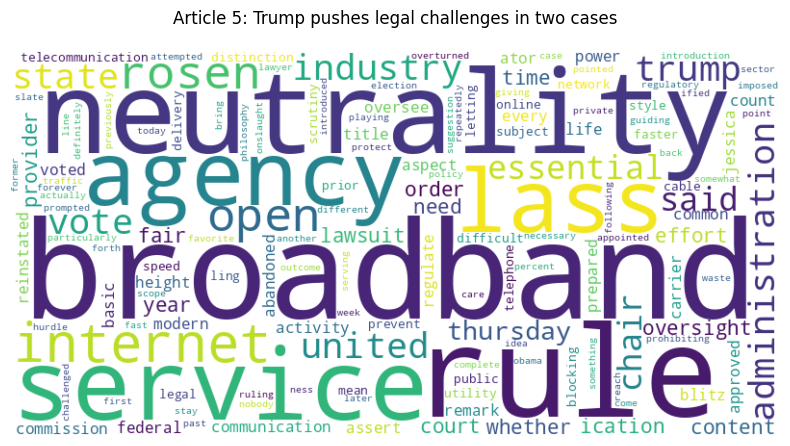

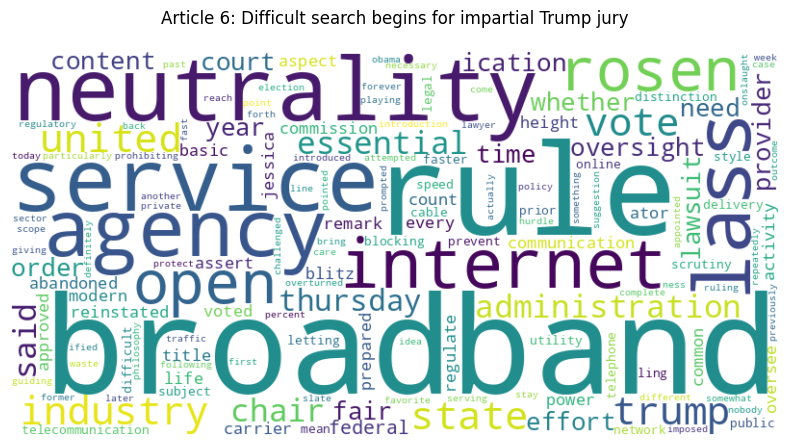

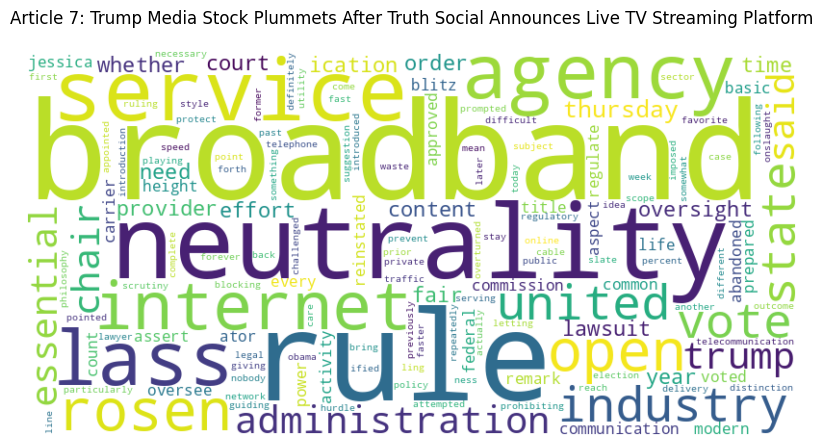

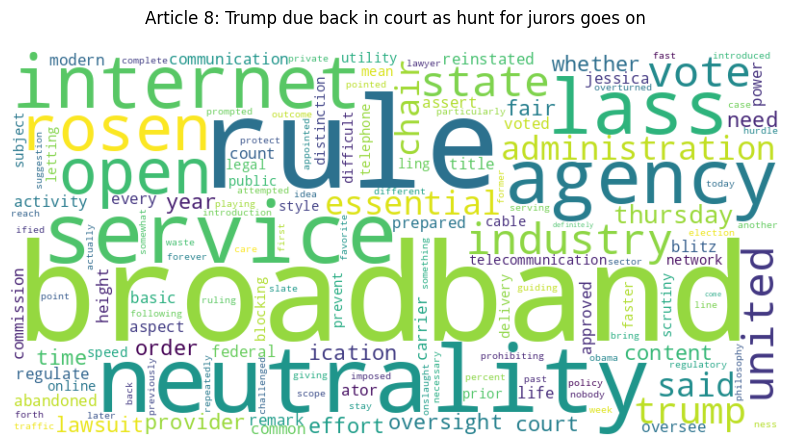

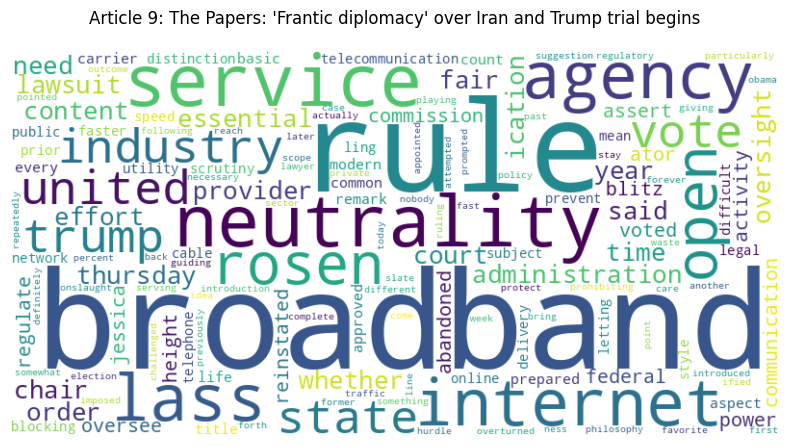

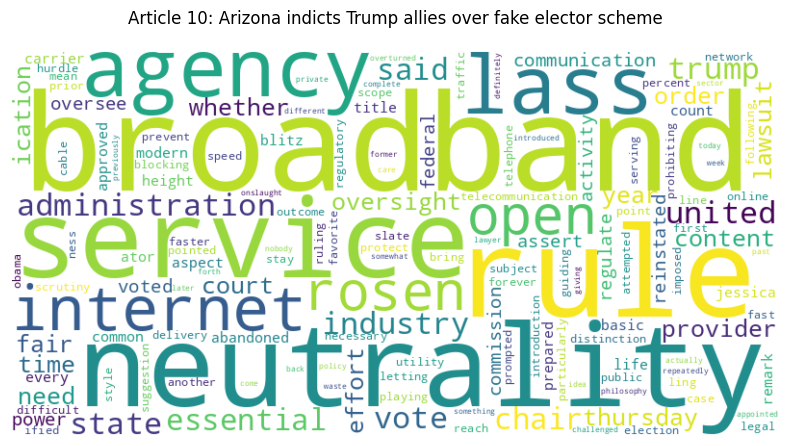

In [229]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud_with_title(filtered_text, title, number):
    """Generate a word cloud from the given text and add title and number."""

    # Filter out words shorter than 4 characters
    filtered_text = ' '.join([word for word in cleaned_text.split() if len(word) > 3])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Article {number}: {title}", fontsize=12, pad=20)  # Add title and number
    plt.show()
    print()  # Print a blank line after each word cloud


#I'll use 'Content' column to generate word clouds.
for index, row in articles_df.iterrows():
    filtered_text = clean_and_tokenize(row['Content'])
    generate_wordcloud_with_title(filtered_text, row['Title'], index + 1)


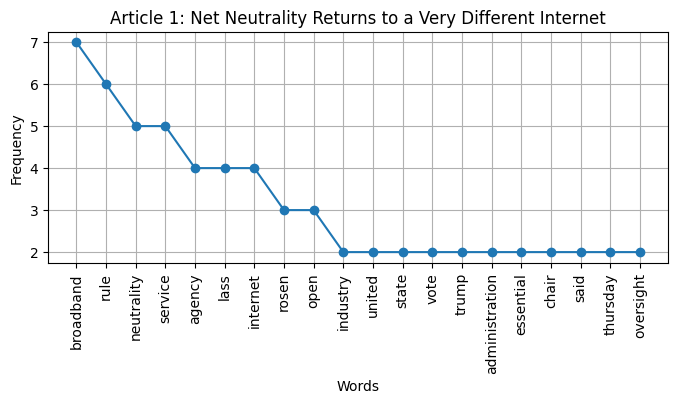

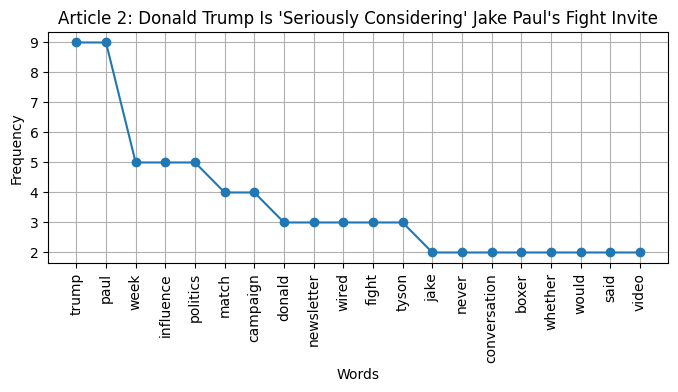

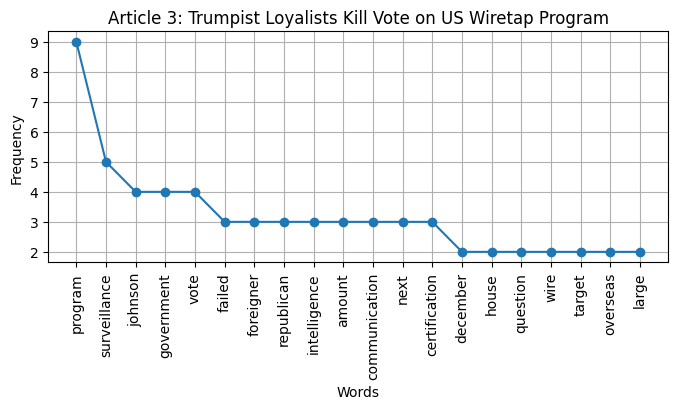

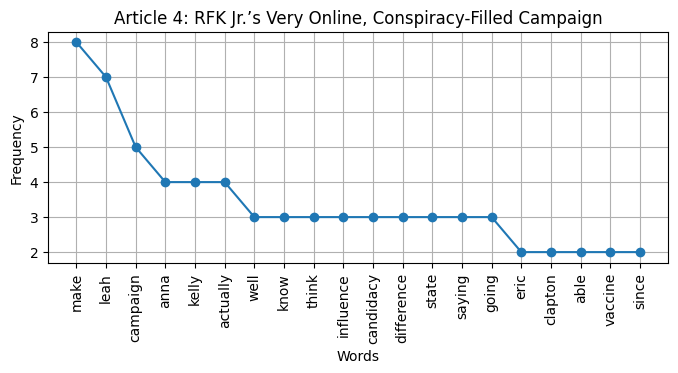

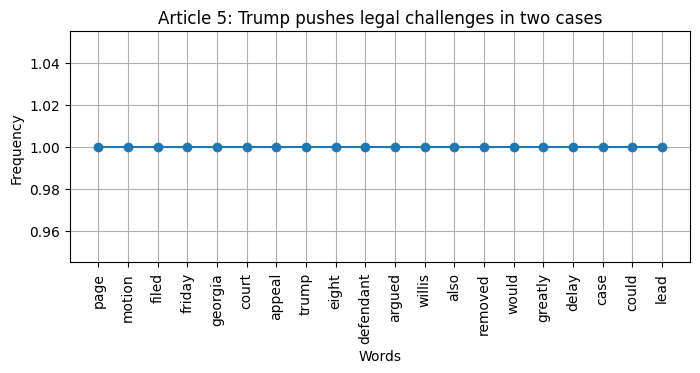

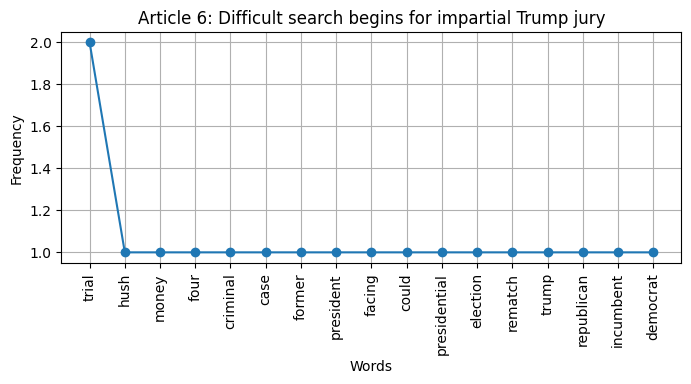

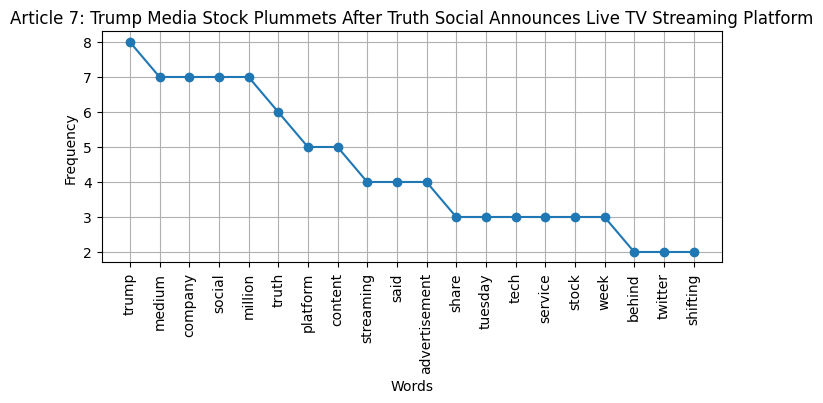

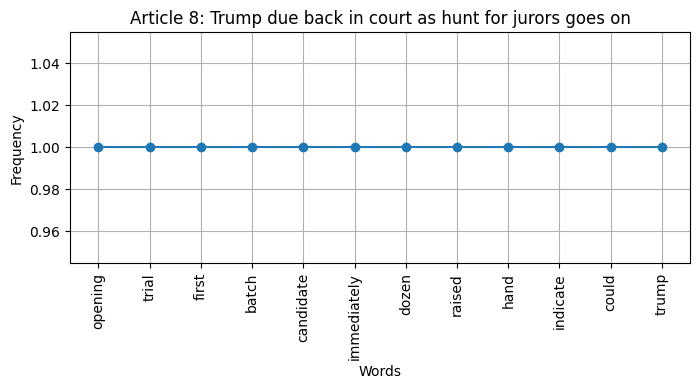

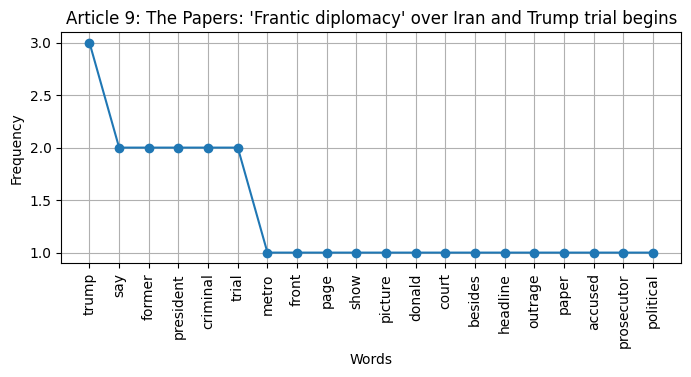

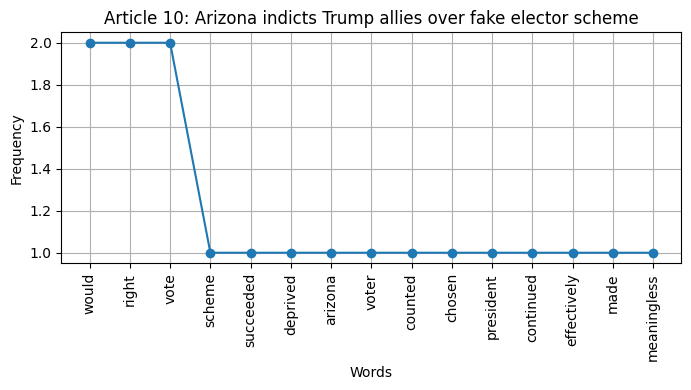

In [230]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_word_frequency_line_graph_with_title(text, title, number):
    """Plot word frequencies as a line graph for the provided text, including a title and number in the plot."""
    # Calculate frequency distribution of the words
    word_freq = Counter(text.split())

    # Prepare data for plotting
    labels, values = zip(*word_freq.items())

    # Sort the frequencies in descending order for better visualization
    values, labels = zip(*sorted(zip(values, labels), reverse=True, key=lambda x: x[0]))

    # Create a line graph
    plt.figure(figsize=(8, 3))
    plt.plot(labels[:20], values[:20], marker='o')  # Plot only top 20 words for clarity
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Article {number}: {title}')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    print()  # Print a blank line after each plot

# Example of how to use this function outside
for index, row in articles_df.iterrows():
    cleaned_text = clean_and_tokenize(row['Content'])
    plot_word_frequency_line_graph_with_title(cleaned_text, row['Title'], index + 1)


In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# articles_df is loaded and contains 'Content' column from your earlier code block
texts = [clean_and_tokenize(article) for article in articles_df['Content'] if pd.notna(article)]

def perform_tfidf_analysis(texts):
    # Initialize the TF-IDF Vectorizer
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)

    # Fit and transform the documents
    tfidf_matrix = tfidf.fit_transform(texts)

    # Create a DataFrame from the TF-IDF array
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    return tfidf_df

# Perform TF-IDF analysis using the cleaned texts
tfidf_data = perform_tfidf_analysis(texts)

tfidf_data



abandoned      able     abuse  according   accused  acknowledged  \
0   0.051916  0.000000  0.000000   0.000000  0.000000      0.000000   
1   0.000000  0.000000  0.000000   0.000000  0.000000      0.000000   
2   0.000000  0.000000  0.052457   0.000000  0.000000      0.052457   
3   0.000000  0.108323  0.000000   0.000000  0.000000      0.000000   
4   0.000000  0.000000  0.000000   0.000000  0.000000      0.000000   
5   0.000000  0.000000  0.000000   0.000000  0.000000      0.000000   
6   0.000000  0.000000  0.000000   0.093328  0.000000      0.000000   
7   0.000000  0.000000  0.000000   0.000000  0.000000      0.000000   
8   0.000000  0.000000  0.000000   0.000000  0.204043      0.000000   
9   0.000000  0.000000  0.000000   0.000000  0.000000      0.000000   

   acquisition  activism  activity    actual  ...    worker     world  \
0     0.000000  0.000000  0.051916  0.000000  ...  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  ...  0.055884  0.000000   
2     0.000000  0.000000  0.000000  0.052457  ...  0.000000  0.000000   
3     0.000000  0.054161  0.000000  0.000000  ...  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6     0.093328  0.000000  0.000000  0.000000  ...  0.000000  0.046664   
7     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
8     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
9     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

      wrote      yeah      year    yearly      york   youtube    zation  \
0  0.000000  0.000000  0.077223  0.000000  0.000000  0.000000  0.000000   
1  0.055884  0.000000  0.083125  0.000000  0.000000  0.055884  0.000000   
2  0.000000  0.000000  0.078028  0.052457  0.000000  0.000000  0.000000   
3  0.000000  0.108323  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.046664   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.204043  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       zing  
0  0.000000  
1  0.000000  
2  0.052457  
3  0.000000  
4  0.000000  
5  0.000000  
6  0.000000  
7  0.000000  
8  0.000000  
9  0.000000  

[10 rows x 622 columns]

In [236]:
from sklearn.decomposition import TruncatedSVD

# Convert the TF-IDF DataFrame to a numpy array if not already done
#X = tfidf_data.toarray()  # This converts the DataFrame from TF-IDF into a usable format for SVD

# Initialize the SVD model with specified parameters
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)

# Fit the SVD model to the data
svd_model.fit(tfidf_data)

# Print the number of topics/components
print("The number of topics chosen are", len(svd_model.components_))


The number of topics chosen are 5


In [237]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [238]:
svd_model.components_.shape

(5, 1000)

In [239]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])

final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', 'band', 'american', 'connected', 'chew', 'needed', 'crazy', 'browser']
['Topic 1: ', 'racist', 'inside', 'actually', 'reimagined', 'institute', 'lucky', 'interview']
['Topic 2: ', 'bureaucracy', 'play', 'replace', 'profitable', 'personalized', 'required', 'acquire']
['Topic 3: ', 'addition', 'puris', 'ownership', 'openai', 'denied', 'surveillance', 'nature']
['Topic 4: ', 'provides', 'maybe', 'rethink', 'moving', 'young', 'managing', 'colleague']


In [240]:

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint


In [197]:
pip install spacy


In [198]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [199]:
import spacy
nlp = spacy.load('en_core_web_md')


In [242]:
import spacy
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords

# Load English tokenizer, tagger, parser, NER, and word vectors from spaCy
nlp = spacy.load("en_core_web_sm")

# Prepare stop words from both spaCy and NLTK
stop_words = set(stopwords.words('english'))
stop_words.update(spacy.lang.en.stop_words.STOP_WORDS)

def preprocess(text):
    """Lemmatizes, removes stop words, and filters out short words."""
    doc = nlp(text)
    result = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 3]
    return ' '.join(result)

# Assuming articles_df is populated as per previous segments and contains a column 'Content'
preprocessed_texts = [preprocess(article) for article in articles_df['Content'] if pd.notna(article)]

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary([text.split() for text in preprocessed_texts])
corpus = [dictionary.doc2bow(text.split()) for text in preprocessed_texts]

# Apply LDA Model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
lda_topics = lda_model.print_topics(num_words=7)
print("LDA Topics:")
for topic in lda_topics:
    print(topic)

# Apply LSI Model
lsi_model = models.LsiModel(corpus, num_topics=5, id2word=dictionary)
lsi_topics = lsi_model.print_topics(num_words=7)
print("\nLSI Topics:")
for topic in lsi_topics:
    print(topic)

# Optional: Save the models, dictionary, and corpus
dictionary.save('articles.dict')
corpora.MmCorpus.serialize('articles.mm', corpus)
lda_model.save('articles_lda.model')
lsi_model.save('articles_lsi.model')


LDA Topics:
(0, '0.034*"trump" + 0.018*"paul" + 0.018*"million" + 0.016*"week" + 0.016*"company" + 0.014*"social" + 0.014*"medium"')
(1, '0.025*"leah" + 0.018*"campaign" + 0.015*"anna" + 0.015*"kelly" + 0.015*"actually" + 0.011*"influence" + 0.011*"know"')
(2, '0.021*"broadband" + 0.018*"rule" + 0.015*"trump" + 0.015*"service" + 0.015*"neutrality" + 0.012*"internet" + 0.012*"agency"')
(3, '0.028*"program" + 0.016*"surveillance" + 0.013*"vote" + 0.013*"government" + 0.013*"johnson" + 0.010*"certification" + 0.010*"communication"')
(4, '0.017*"right" + 0.017*"vote" + 0.009*"president" + 0.009*"continue" + 0.009*"succeed" + 0.009*"meaningless" + 0.009*"choose"')

LSI Topics:
(0, '0.440*"trump" + 0.249*"million" + 0.231*"company" + 0.221*"social" + 0.213*"medium" + 0.205*"week" + 0.191*"truth"')
(1, '-0.293*"program" + -0.226*"vote" + -0.177*"broadband" + -0.163*"surveillance" + 0.156*"medium" + -0.152*"rule" + 0.146*"company"')
(2, '0.345*"paul" + 0.277*"campaign" + 0.243*"influence" + -0

In [243]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
perplexity_lda = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', perplexity_lda)

# Prepare texts for Coherence Score computation
texts_for_coherence = [text.split() for text in preprocessed_texts]

# Compute Coherence Score using texts
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_for_coherence, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -6.380059163749218

Coherence Score:  0.49047768460582103


In [213]:
pip install pyLDAvis


In [205]:
pip install matplotlib


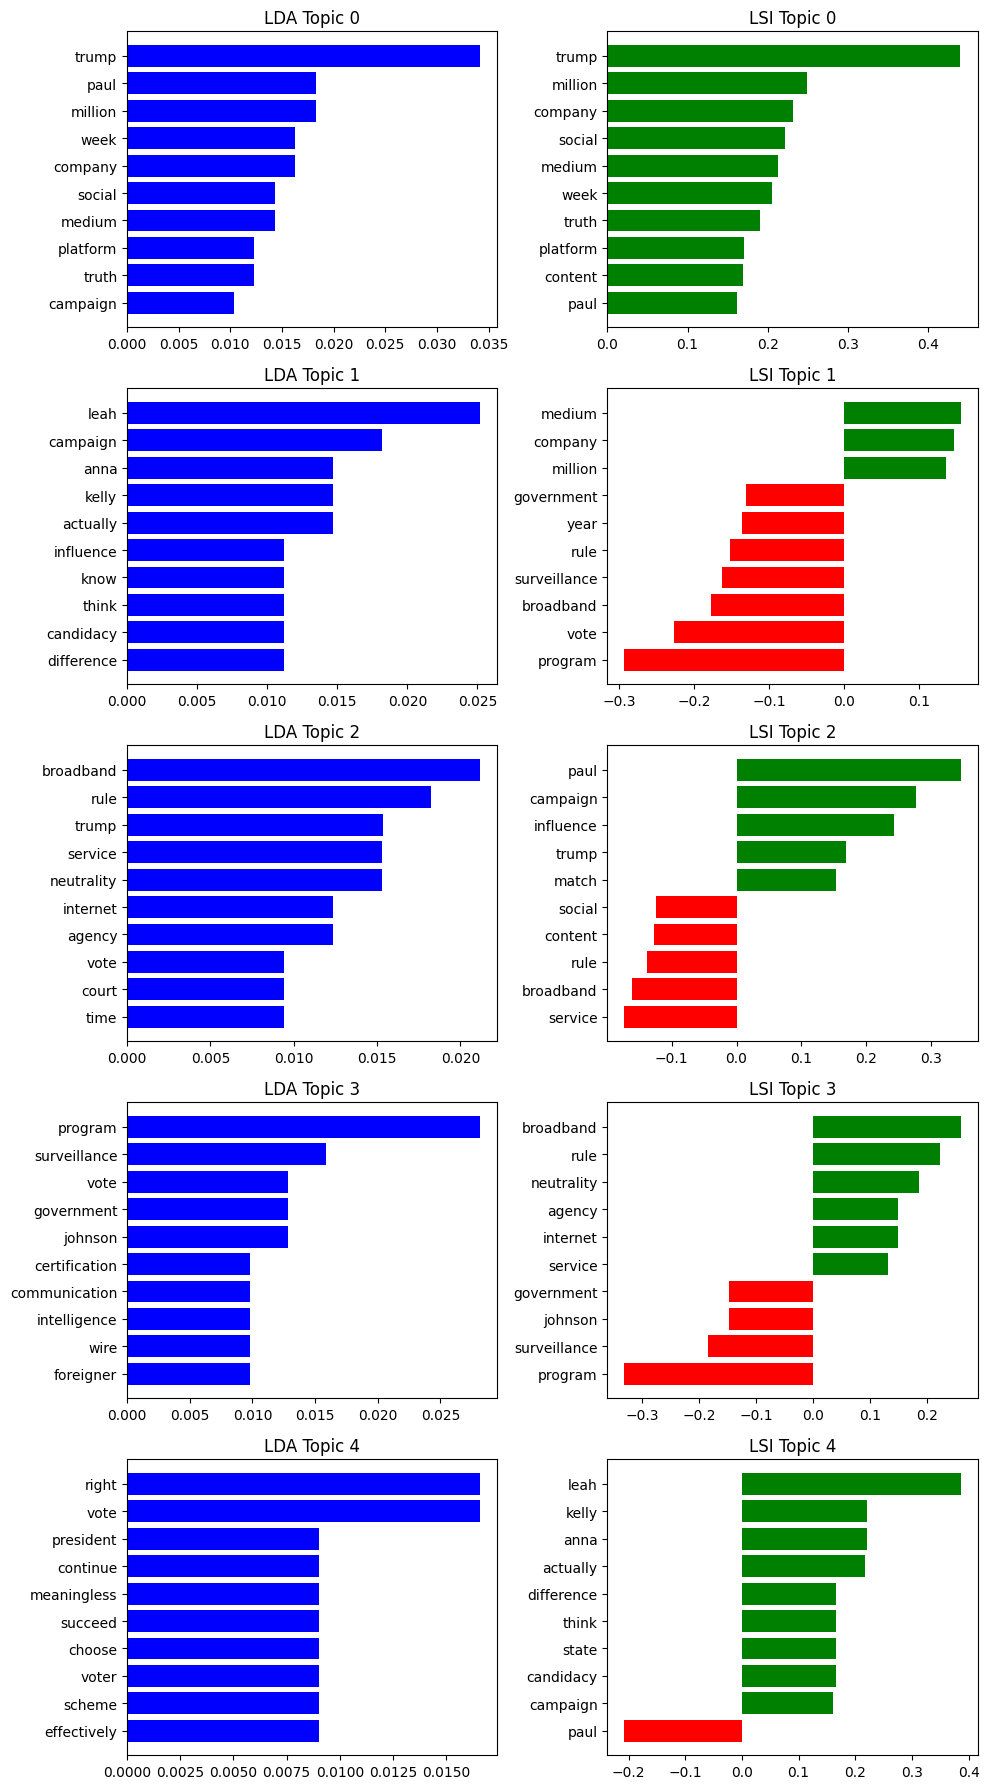

In [244]:
import matplotlib.pyplot as plt

def plot_topics(lda_model, lsi_model, num_topics=5):
    # Define colors for different models for clearer separation and understanding
    color_map = {
        'LDA': 'blue',  # Only positive weights are expected in LDA
        'LSI_positive': 'green',
        'LSI_negative': 'red'
    }

    # Set figure size
    plt.figure(figsize=(10, 18))  # Adjusted for two columns

    # Loop through the number of topics to plot each one
    for i in range(num_topics):
        # Plot LDA topics
        plt.subplot(num_topics, 2, 2 * i + 1)  # Change subplot index for two columns
        topic_lda = lda_model.show_topic(i, topn=10)
        terms_lda, weights_lda = zip(*sorted(topic_lda, key=lambda x: x[1]))
        plt.barh(terms_lda, [abs(w) for w in weights_lda], color='blue')
        plt.title(f'LDA Topic {i}')

        # Plot LSI topics
        plt.subplot(num_topics, 2, 2 * i + 2)  # Change subplot index for two columns
        topic_lsi = lsi_model.show_topic(i, topn=10)
        terms_lsi, weights_lsi = zip(*sorted(topic_lsi, key=lambda x: x[1]))
        colors = ['green' if w > 0 else 'red' for w in weights_lsi]
        plt.barh(terms_lsi, weights_lsi, color=colors)
        plt.title(f'LSI Topic {i}')

    # Layout adjustment to avoid overlap
    plt.tight_layout()
    plt.show()

plot_topics(lda_model, lsi_model, num_topics=5)
